In [1]:
import pickle
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G_CIFAR = "cifar_graph"
G_FASHION = "fashion_mnist_graph"
G_FIW = "fiw_graph"
G_IRIS = "iris_graph"
G_MNIST = "mnist_graph"
G_NEWSGROUP = "newsgroup_graph"
G_WINE = "wine_graph"
GRAPHS = [
    G_CIFAR,
    G_FASHION,
    G_FIW,
    G_IRIS,
    G_MNIST,
    G_NEWSGROUP,
    G_WINE,
]

graphs = {}
for g in GRAPHS:
    graphs[g] = pickle.load(open("graphs/" + g + ".bin", "rb"))

In [4]:
def plot_loglog(graph):
    k = []
    Pk = []
    logk = []
    logPk = []

    for node in list(graph.nodes()):
        degree = graph.degree(nbunch=node)
        try:
            pos = k.index(degree)
        except ValueError as e:
            k.append(degree)
            Pk.append(1)
        else:
            Pk[pos] += 1

    # get a double log representation
    for i in range(len(k)):
        logk.append(math.log10(k[i]))
        logPk.append(math.log10(Pk[i]))

    order = np.argsort(logk)
    logk_array = np.array(logk)[order]
    logPk_array = np.array(logPk)[order]
    plt.plot(logk_array, logPk_array, ".")
    m, c = np.polyfit(logk_array, logPk_array, 1)
    plt.plot(logk_array, m*logk_array + c, "-")

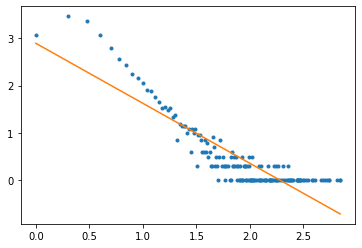

In [9]:
plot_loglog(graphs[G_CIFAR])

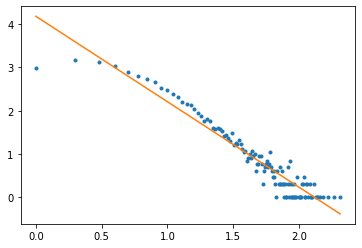

In [10]:
plot_loglog(graphs[G_FASHION])

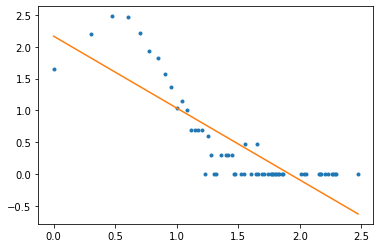

In [11]:
plot_loglog(graphs[G_FIW])

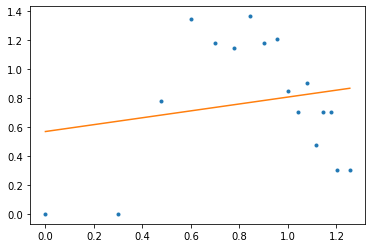

In [12]:
plot_loglog(graphs[G_IRIS])

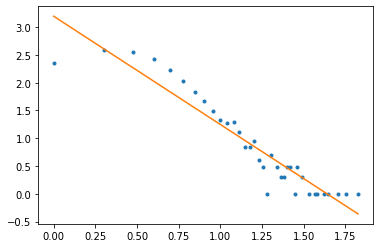

In [13]:
plot_loglog(graphs[G_MNIST])

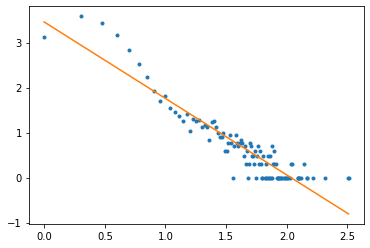

In [14]:
plot_loglog(graphs[G_NEWSGROUP])

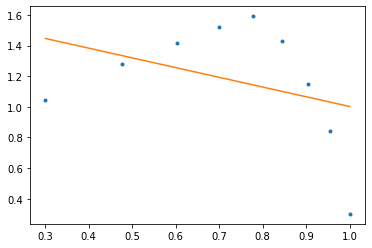

In [15]:
plot_loglog(graphs[G_WINE])